**Gender: 0 - male, 1 - female**

**Hemoglobin: Hemoglobin is a protein in your red blood cells that carries oxygen to your body's organs and tissues and transports carbon dioxide from your organs and tissues back to your lungs**

**MCH: MCH is short for "mean corpuscular hemoglobin." It's the average amount in each of your red blood cells of a protein called hemoglobin, which carries oxygen around your body.**

**MCHC: MCHC stands for mean corpuscular hemoglobin concentration. It's a measure of the average concentration of hemoglobin inside a single red blood cell.**

**MCV: MCV stands for mean corpuscular volume. An MCV blood test measures the average size of your red blood cells.**

**Results: 0- not anemic, 1-anemic**



In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

from scipy.stats import mode

In [2]:
dataset = pd.read_csv('../input/predict-anemia/anaemia.csv')

In [3]:
l=len(dataset)
print(l)
dataset.head()

732


,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [4]:
x=dataset.iloc[:,0:-1]
y=dataset.iloc[:,[-1]]

In [5]:
print(x.head())
print("\n")
print(y.head())

   Gender  Hemoglobin   MCH  MCHC   MCV
0       1        14.9  22.7  29.1  83.7
1       0        15.9  25.4  28.3  72.0
2       0         9.0  21.5  29.6  71.2
3       0        14.9  16.0  31.4  87.5
4       1        14.7  22.0  28.2  99.5


   Result
0       0
1       0
2       1
3       0
4       0


In [7]:
def dist(pt1,pt2):
    sum_sq=np.sum(np.abs(pt1 - pt2))
    distance=np.sqrt(sum_sq)
    return distance

In [8]:
def KNN(x_train,x_test,y_train,y_test,k):
    y_pred=[]
    for test_pt in x_test.to_numpy():
        distances=[]
        for i in range(len(x_train)):
            distances.append(dist((np.array(x_train.iloc[i])),test_pt))
            
        distance_data=pd.DataFrame(data=distances, columns=['distance'],index=y_train.index)
        
        k_nearest_list=distance_data.sort_values(by=['distance'],axis=0)[:k]
        
        labels=y_train.loc[k_nearest_list.index]
        
        voting=mode(labels).mode[0]
        
        y_pred.append(voting)
    return y_pred

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

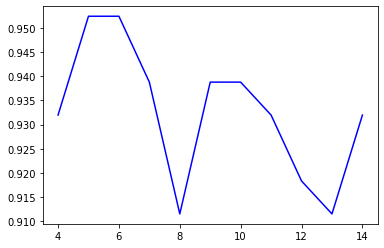

In [10]:
accuracy_list=[]
max=0
for i in range(4,15):
    y_pred=KNN(x_train,x_test,y_train,y_test,i)
    accuracy_list.append(accuracy_score(y_test,y_pred))
    if(accuracy_score(y_test,y_pred)>max):
        max=accuracy_score(y_test,y_pred)
        k=i

plt.plot(range(4,15),accuracy_list,color='blue')

In [11]:
print("Maximum accuracy is attained at k =",k)
y_pred=KNN(x_train,x_test,y_train,y_test,5)
print("Accuracy =",accuracy_score(y_test,y_pred))

Maximum accuracy is attained at k = 5
Accuracy = 0.9523809523809523
[[83  5]
 [ 2 57]]
Accuracy = 0.9591836734693877
Accuracy = 0.9387755102040817
Accuracy = 0.9115646258503401
